## Correlation Analysis
---

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*The Analysis is based on the simulations file where it is been iterated all the interactions among the different variables*

---
#### Runing the generator

In [ ]:
!python ../create_crowdED.py

        tasks = [100]
        workers = [30, 40]
        prop = [0.5, 0.6]
        wpt = [3, 5, 7]
        answers_key = ["liver", "blood", "lung", "brain", "heart"]
        hard_t = [0.2]
        good_w = [0.9]

In [2]:
df_simulations = pd.read_csv('../data/20180816simulations.csv')

In [6]:
df_simulations.head()

,total_tasks,total_workers,proportion_hard_tasks,proportion_train_tasks,workers_per_task,total_keys,accuracy
0,60,30,0.2,0.2,3,3,0.9611
1,60,30,0.2,0.2,3,5,0.9556
2,60,30,0.2,0.2,3,7,0.9722
3,60,30,0.2,0.2,5,3,0.9267
4,60,30,0.2,0.2,5,5,0.9733


In [12]:
df_simulations[df_simulations['accuracy'] ==0 ]['accuracy'].count() / len(df_simulations) *100

3.268229166666667

In [14]:
df_simulations['rel_work_task'] = df_simulations['total_workers']/df_simulations['total_tasks']

In [16]:
#df_simulations = df_simulations.loc[:, df_simulations.columns != 'event']

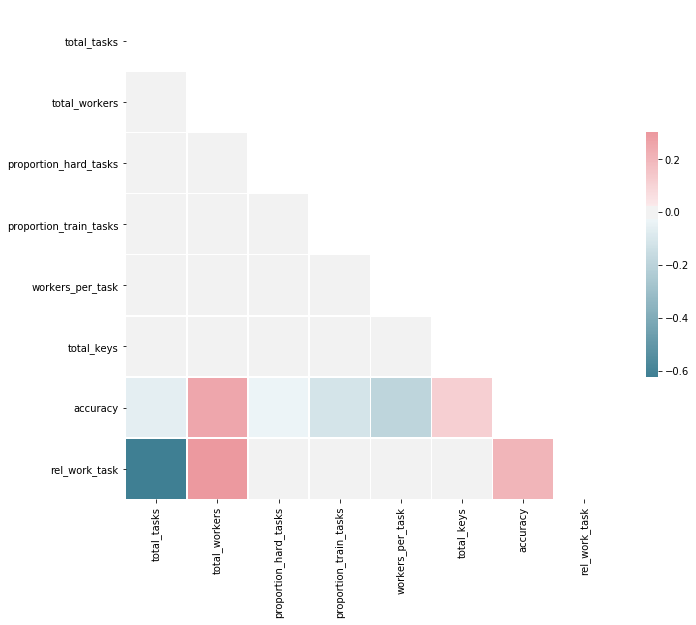

In [17]:
corr = df_simulations.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})